<a href="https://colab.research.google.com/github/eduardocarbo/NewRepo/blob/master/ESCUELA_ING_PGAD_Proyecto1_BORRADOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caso Credit Scoring
___________________________________________________________________________
 Descripción: 
Los datos responden a información sobre solicitudes de crédito a un banco. 
Se aporta una muestra de 4455 clientes de los que se dispone de información sociodemográfica y económica, las características del crédito solicitado y el resultado de la evaluación. 
Existen dos categorías de dictamen: positivo indica que el crédito se puede conceder, y negativo, que se va a denegar. 
Se quieren entender las diferencias entre aquéllos que tienen dictamen positivo y los que no. Existen varias alternativas, pero para cualquiera de ellas, el primer paso es realizar una buena descriptiva y depuración de los datos.


Diccionario: Necesario para entender y para convertir algunas variables de “numéricas” a factores.
El valor 99999999 en las variables continuas indica valor faltante. El 0 lo indica en la categóricas. 
Codificaciones: 
____________________________________________________________________________
  (a tener en cuenta para realizar el análisis y obtener la vista MINABLE de los datos)

  dictamen final (variable de respuesta)
  -----------------------------------------

  1 positivo

  2 negativo

  Antigüedad en el trabajo (años) (how many years in the current work?)
  ----------------------------------------- 

  vivienda (kind of house)
  -----------------------------------------

  1 alquiler (renting) 

  2 escritura publica (registered)

  3 contrato privado (private contract) 

  4 ignora contrato (ignore contract)

  5 padres (parents) 

  6 otros (other) 

  Plazo del préstamo (meses) (timing for credit) 
  -----------------------------------------

  Edad (age) 
-----------------------------------------
  Estado civil (civil status) 
-----------------------------------------
   1 soltero (bachelor)

   2 casado (married)

   3 viudo (widow) 

   4 separado (separated)

   5 divorciado (divorced)

Registros (registers) 
-----------------------------------------
  1 no 
  2 si 
tipo de trabajo (work) 
-----------------------------------------
  1 empleado fijo (indefinite) 

  2 empleado temporal (temporal) 

  3 autonomo (autonomous) 

  4 otros (other) 

Gastos (Kpts) (Expenditures)
-----------------------------------------
Ingresos (Kpts) (Incomes) 
-----------------------------------------
Patrimonio (Kpts)
-----------------------------------------
Patrimonio por amortizar (Kpts) (part of the patrimonium financed and pending to pay) 
-----------------------------------------
Préstamo solicitado (Kpts) (Credit required) 
-----------------------------------------
Precio del bien financiado (Kpts) (Price of the target good)
-----------------------------------------

#Descarga e instalación de librerías
________________________________________________________________________________


In [187]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn

In [188]:
#librerías a que se usarán apra hacer el análisis:
import pandas as pd #Calculadora potente tipo >Excel
import numpy as np #Análisis de datos
import matplotlib.axes._subplots as plt #Para gráficas
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns #Para tener otra variedad de gráficas EN ESTE CASO ME SERVIRÁ PARA CREAR LOS HISTOGRAMAS Y MIRAR SU COMPORTAMIENTO QUE PUEDE SER TAMBIÉN VARIABLES CATEGÓRICAS
sns.set(style='whitegrid', context='notebook')
import datetime # Para trabajar con forma fechas si se requiere
import warnings # para mirar los tipos de errores
%matplotlib inline
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport # una parte particular en el manejo de datos

In [189]:
!pip install regressors #Instalando paquete de Regresión Lineal  

#Descargando los datos
Descargaremos los datos y veamos cómo se ven.

In [190]:
#Se trae los datos del csv para empesar a identificar las columnas y el estado de los datos:
df = pd.read_csv('credsco.csv', sep=';')
df.head(5)

,Dictamen,Antiguedad.Trabajo,Vivienda,Plazo,Edad,Estado.civil,Registros,Tipo.trabajo,Gastos,Ingresos,Patrimonio,Cargas.patrimoniales,Importe.solicitado,Precio.del.bien.financiado
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


#Permite  ver la estructura del dataset

In [191]:
df.info()#ANALIZANDO LAS VARIABLES (TIPO DE VARIABLES)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Dictamen                    4455 non-null   int64
 1   Antiguedad.Trabajo          4455 non-null   int64
 2   Vivienda                    4455 non-null   int64
 3   Plazo                       4455 non-null   int64
 4   Edad                        4455 non-null   int64
 5   Estado.civil                4455 non-null   int64
 6   Registros                   4455 non-null   int64
 7   Tipo.trabajo                4455 non-null   int64
 8   Gastos                      4455 non-null   int64
 9   Ingresos                    4455 non-null   int64
 10  Patrimonio                  4455 non-null   int64
 11  Cargas.patrimoniales        4455 non-null   int64
 12  Importe.solicitado          4455 non-null   int64
 13  Precio.del.bien.financiado  4455 non-null   int64
dtypes: int64

In [192]:
df.describe()#OTRA FORMA DE MIRAR LOS DATOS

,Dictamen,Antiguedad.Trabajo,Vivienda,Plazo,Edad,Estado.civil,Registros,Tipo.trabajo,Gastos,Ingresos,Patrimonio,Cargas.patrimoniales,Importe.solicitado,Precio.del.bien.financiado
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [193]:
df.columns #Determinop que columnas tengo en el DataFrame

Index(['Dictamen', 'Antiguedad.Trabajo', 'Vivienda', 'Plazo', 'Edad',
       'Estado.civil', 'Registros', 'Tipo.trabajo', 'Gastos', 'Ingresos',
       'Patrimonio', 'Cargas.patrimoniales', 'Importe.solicitado',
       'Precio.del.bien.financiado'],
      dtype='object')

#Dimensión del DataFrame

In [194]:
df.shape #Se tienen 4455 filas referentes an número de clientes y las 14 columnas del DataFrame

(4455, 14)

#Análisis de los Datos
Se observará cómo se dsitrbuyen los datos de la variable a predecir.

(4455, 14)


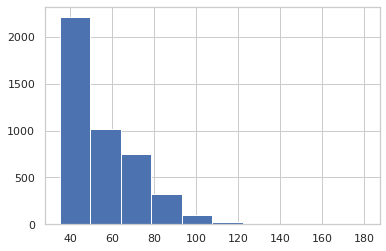

In [195]:
print(df.shape) #para la dimensión de los datos
df.Gastos.hist(bins = 10)#Para tener un contexto de los datos

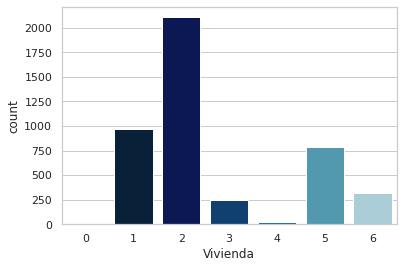

In [196]:
sns.countplot(df['Vivienda'], palette ='ocean')


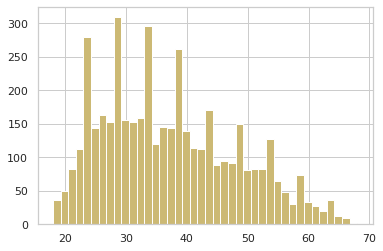

In [197]:
df.Edad.hist(bins = 40, color ='Y') #Para tener un contexto de los datos.

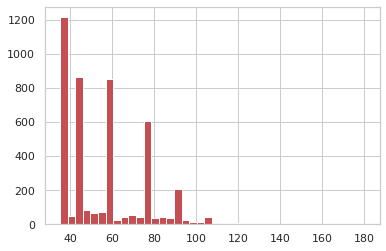

In [198]:
df.Gastos.hist(bins = 40, color ='R') #Para tener un contexto de los datos.

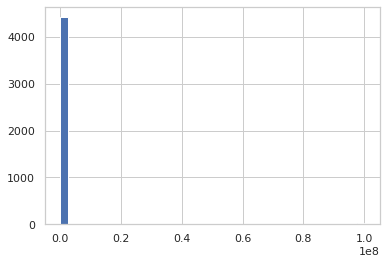

In [199]:
df.Ingresos.hist(bins = 40, color ='B') #Para tener un contexto de los datos.

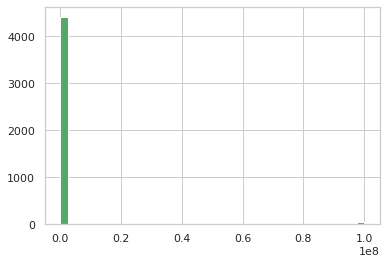

In [200]:
df.Patrimonio.hist(bins = 40, color ='G') #Para tener un contexto de los datos.

#Viendo correlaciones
Ahora entendemos nuestros datos, viendo cómo se distribuyen y correlacionan.

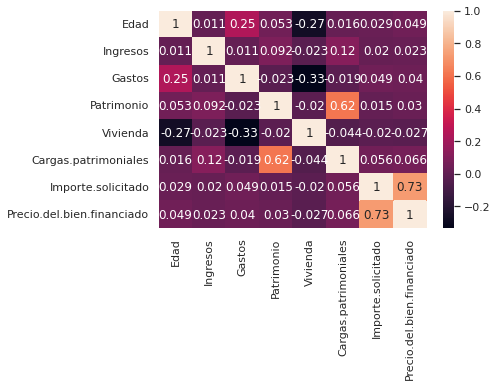

In [216]:
import numpy as np
numeric_cols =['Edad','Ingresos','Gastos','Patrimonio','Vivienda','Cargas.patrimoniales','Importe.solicitado','Precio.del.bien.financiado']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

In [ ]:
import matplotlib.pyplot as plt
#numeric_cols =['Ingresos','Patrimonio']
sns.pairplot(df, height=2.5)
plt.show()

#Creando modelos
Primero se usará un modelo con todas las variables.

In [218]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Para crear un data set de prueba y un data set de entrenamiento

In [219]:
X_cols = list(set(df.columns )-set(['Edad']))#Todas las filas menos la variable predictora que es charges
y_col = ['Edad']#Coloco en esta variable mi variable predictora charges

X= df[X_cols].values #Variables que tienen toda la información de las columnas X_cols y está en numpy
y = df[y_col].values 

X_train, X_test, y_train, y_test = train_test_split(X,y)#aquí coloco variabloes de entrenamiento con X_train y X_test para probar el modelo
sc_x = StandardScaler().fit(X) #Se hace una estandarización de los datos.
sc_y = StandardScaler().fit(y) #Se hace una estandarización de los datos.

X_train = sc_x.transform(X_train)#normalización de los datos, aplciamos la transformada de los datos de entrenamiento esto se hace tambien para las variables de prueba
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)#se hace lo mismo que se hizo en als variables de x
y_test = sc_y.transform(y_test)

model = LinearRegression() #se crea el modelo cuando ya se tiene todas las variables
model.fit(X_train, y_train) #los datos para entrenar el modelo
y_pred = model.predict(X_test) # para hacer una predicción de los datos con los datos de prueba

In [220]:
y_pred.shape #Para verificar que todo esté corriendo normal y que tanto está prediciendo.

(1114, 1)

#Funciones métricas
El siguiente punto es calcular las métricas del modelo

In [221]:
import sklearn.metrics as metrics 
mse = metrics.mean_squared_error(y_test,y_pred) #metricas de sklearn, y se le dá las variables que se evaluan entre y_test y y_pred
r2 = metrics.r2_score(y_test, y_pred)#esto es para caulcular el r2, que es error cuadrático.

print("r2",r2.round(4)) #cuando el r2 es mayor 75% es un buen modelo para predicción
print("mse:", mse.round(4)) #mse es bajo , este valuar se evalua con la estandarización de -3 a 3

r2 0.3906
mse: 0.6087
